Importing libraries

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import date
from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt
import cvxpy as cp
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

Choose the tickers of our stocks and download the data from Yahoo finance

In [16]:
tickers = ["AAPL", "BP", "CVX", "GOOG", "JNJ", "JPM", "MA", "MSFT", "NVDA", "V"]
n = len(tickers)
yf.pdr_override()
prices = data.get_data_yahoo(tickers, start='2014-01-01', end='2023-12-31')["Adj Close"]


[*********************100%%**********************]  10 of 10 completed


Price evolution

In [17]:
prices

Ticker            AAPL         BP         CVX        GOOG         JNJ  \
Date                                                                    
2014-01-02   17.296656  26.411955   80.707657   27.724083   68.816704   
2014-01-03   16.916727  26.351404   80.844162   27.521841   69.436607   
2014-01-06   17.008966  26.422974   80.629639   27.828691   69.799484   
2014-01-07   16.887327  26.725731   81.312271   28.365179   71.281181   
2014-01-08   16.994274  26.824820   80.155022   28.424210   71.182922   
...                ...        ...         ...         ...         ...   
2023-12-22  193.353287  34.899246  149.419571  142.720001  154.288544   
2023-12-26  192.803986  35.235096  150.764893  142.820007  154.963409   
2023-12-27  192.903839  35.294365  150.270294  141.440002  155.171844   
2023-12-28  193.333298  34.899246  148.153397  141.279999  155.400101   
2023-12-29  192.284637  34.968391  147.549973  140.929993  155.558899   

Ticker             JPM          MA        MSFT        NVDA           V  
Date                                                                    
2014-01-02   43.791943   78.203377   31.233061    3.740548   51.426998  
2014-01-03   44.130466   77.891174   31.022928    3.695736   51.461891  
2014-01-06   44.386257   77.504929   30.367348    3.745265   51.152424  
2014-01-07   43.874687   78.584518   30.602688    3.806584   51.543346  
2014-01-08   44.288437   78.561035   30.056355    3.858472   51.708549  
...                ...         ...         ...         ...         ...  
2023-12-22  165.409225  422.846954  373.888580  488.277069  257.949005  
2023-12-26  166.387451  422.418213  373.968445  492.766907  258.677643  
2023-12-27  167.385437  423.106140  373.379547  494.146820  258.448059  
2023-12-28  168.274734  425.060364  374.587280  495.196777  259.915344  
2023-12-29  168.077118  425.249847  375.345886  495.196777  259.865448  

[2516 rows x 10 columns]

Annualized estimate of return

In [18]:
r = expected_returns.mean_historical_return(prices)
r


Ticker
AAPL    0.272935
BP      0.028518
CVX     0.062318
GOOG    0.176942
JNJ     0.085152
JPM     0.144268
MA      0.184917
MSFT    0.282911
NVDA    0.631571
V       0.176239
dtype: float64

Annualized covariance matrix estimate

In [19]:
Sigma = risk_models.sample_cov(prices)
Sigma


Ticker      AAPL        BP       CVX      GOOG       JNJ       JPM        MA  \
Ticker                                                                         
AAPL    0.080545  0.026511  0.028398  0.047677  0.018803  0.033532  0.044762   
BP      0.026511  0.098259  0.071459  0.024845  0.015899  0.046969  0.037913   
CVX     0.028398  0.071459  0.087126  0.027452  0.019619  0.047859  0.038469   
GOOG    0.047677  0.024845  0.027452  0.078073  0.017617  0.032453  0.044900   
JNJ     0.018803  0.015899  0.019619  0.017617  0.032417  0.020087  0.021181   
JPM     0.033532  0.046969  0.047859  0.032453  0.020087  0.072565  0.043157   
MA      0.044762  0.037913  0.038469  0.044900  0.021181  0.043157  0.074662   
MSFT    0.051557  0.025798  0.029019  0.053891  0.019974  0.033527  0.047076   
NVDA    0.072753  0.035715  0.037451  0.070473  0.018784  0.044729  0.064269   
V       0.039609  0.033553  0.034837  0.039855  0.019832  0.039087  0.060366   

Ticker      MSFT      NVDA         V  
Ticker                                
AAPL    0.051557  0.072753  0.039609  
BP      0.025798  0.035715  0.033553  
CVX     0.029019  0.037451  0.034837  
GOOG    0.053891  0.070473  0.039855  
JNJ     0.019974  0.018784  0.019832  
JPM     0.033527  0.044729  0.039087  
MA      0.047076  0.064269  0.060366  
MSFT    0.073275  0.076088  0.041860  
NVDA    0.076088  0.215045  0.056107  
V       0.041860  0.056107  0.061350

Estimated volatilities

In [27]:
for i in range(n):
    print(tickers[i], ": ", np.sqrt(np.diag(Sigma))[i])


AAPL :  0.2838052022411605
BP :  0.31346284222223775
CVX :  0.2951704760861705
GOOG :  0.2794147029268893
JNJ :  0.18004820079376244
JPM :  0.26937841983148864
MA :  0.2732432248625717
MSFT :  0.2706930017805542
NVDA :  0.4637296561941233
V :  0.24768861394271005


Correlation matrix with heatmap

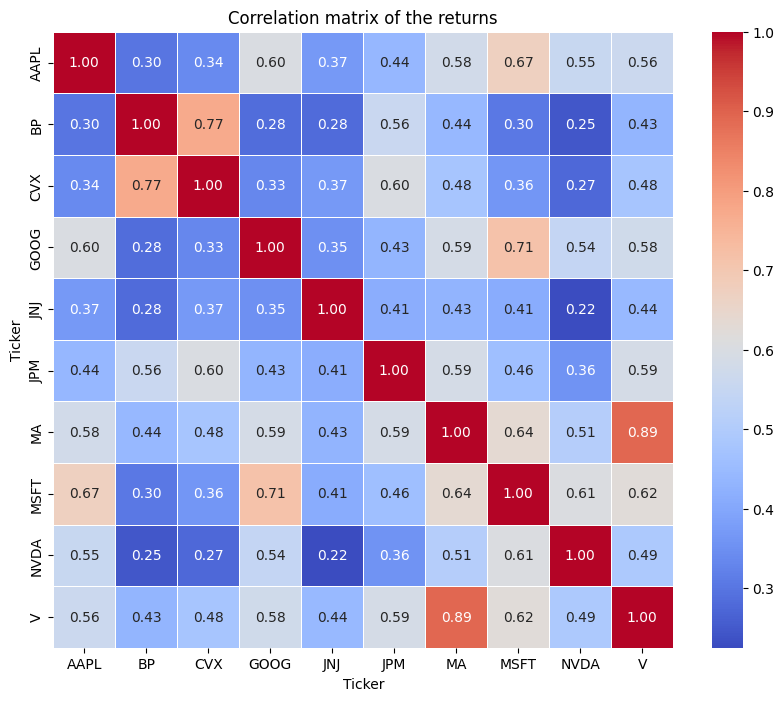

In [22]:
Corr = risk_models.cov_to_corr(Sigma)
Corr

plt.figure(figsize=(10, 8))
sns.heatmap(Corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix of the returns')
plt.savefig("corr.png")
plt.show()

Efficient frontier for a model without transaction costs

In [23]:
ef = EfficientFrontier(r, Sigma)
ef_max_sharpe = EfficientFrontier(r, Sigma)
ef_min_volatility = EfficientFrontier(r, Sigma)

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


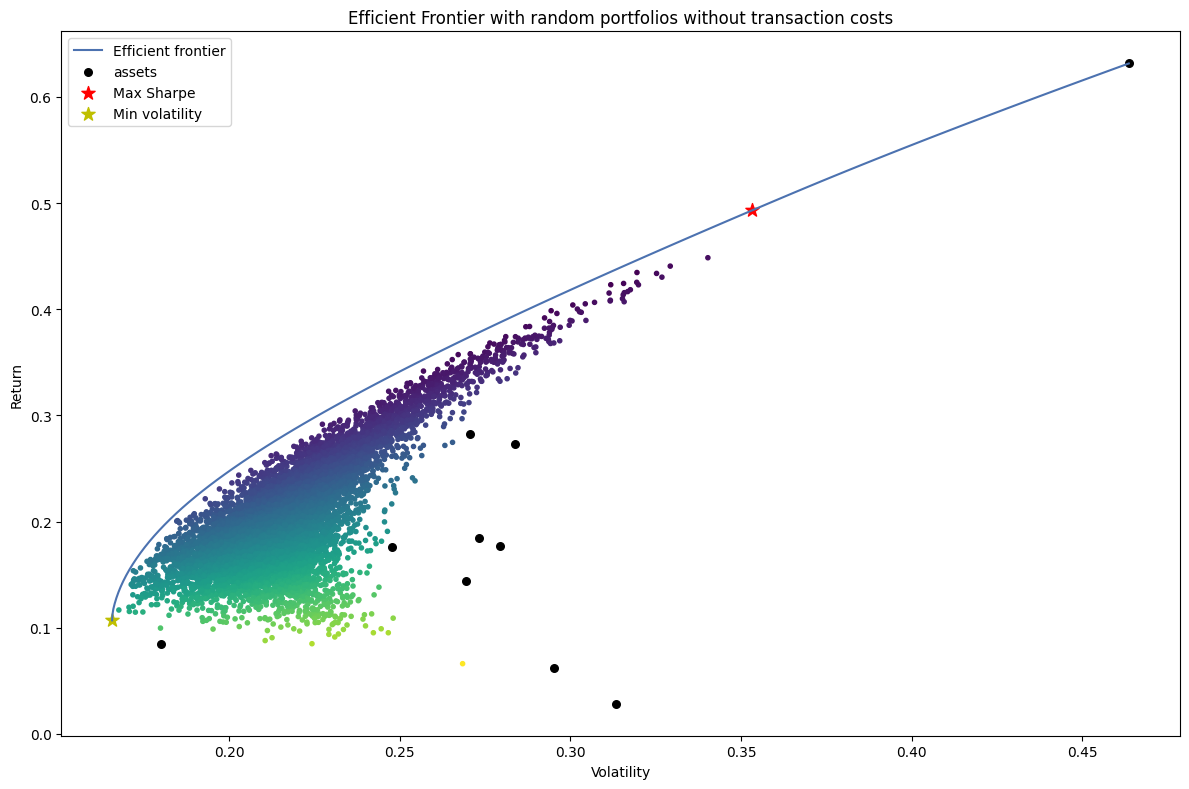

In [24]:
ef = EfficientFrontier(r, Sigma)
fig, ax = plt.subplots(figsize=(12, 8))

plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

sharpe = ef_max_sharpe.max_sharpe(risk_free_rate=0.01)
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

minvol = ef_min_volatility.min_volatility()
ret_tangent, std_tangent, _ = ef_min_volatility.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="y", label="Min volatility")

n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

ax.set_title("Efficient Frontier with random portfolios without transaction costs")
ax.legend()
plt.tight_layout()

plt.savefig("ef_scatter.png", dpi=200)
plt.show()

Maximum Sharpe ratio $(\frac{R_p - R_f}{\sigma_f})$ 

In [25]:
ef_max_sharpe.portfolio_performance(verbose=True, risk_free_rate=0.01)
ef_max_sharpe.clean_weights()


Expected annual return: 49.3%
Annual volatility: 35.3%
Sharpe Ratio: 1.37


OrderedDict([('AAPL', 0.1405),
             ('BP', 0.0),
             ('CVX', 0.0),
             ('GOOG', 0.0),
             ('JNJ', 0.02771),
             ('JPM', 0.0),
             ('MA', 0.0),
             ('MSFT', 0.20906),
             ('NVDA', 0.62274),
             ('V', 0.0)])

Minimum volatility portfolio

In [26]:
ef_min_volatility.portfolio_performance(verbose=True, risk_free_rate = 0.01)
ef_min_volatility.clean_weights()


Expected annual return: 10.7%
Annual volatility: 16.6%
Sharpe Ratio: 0.59


OrderedDict([('AAPL', 0.05356),
             ('BP', 0.09755),
             ('CVX', 0.0),
             ('GOOG', 0.08891),
             ('JNJ', 0.65689),
             ('JPM', 0.03058),
             ('MA', 0.0),
             ('MSFT', 0.00705),
             ('NVDA', 0.0),
             ('V', 0.06547)])

Optimization with transaction costs

In [31]:
#proportional transaction costs
p_matrix = [
    [0.0045,0.0045, 0.0045,0.0045,0.0045,0.0045,0.0045,0.0045,0.0045,0.0045],
    [0.008,0.008, 0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008],
    [0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018]
]
#fixed transaction costs
f_matrix = [
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [14.9,14.9,14.9,14.9,14.9,14.9,14.9,14.9,14.9,14.9]
]


Compute efficient frontier for transaction costs, find maximum Sharpe ratio portfolio, different brokers

Broker: Trading 212, no fixed costs, budget doesn't matter

In [80]:
p = p_matrix[0]
f = f_matrix[0]
ax1 = []
ax2 = []
ret = 0
ratio = -1000
for i in range(120):
    lam = cp.Variable(n)
    y = cp.Variable(n, boolean=True)
    objective = cp.Minimize(cp.quad_form(lam, Sigma))
    constraints = []
    constraints.append(cp.sum( cp.multiply(lam,r-p)) - (1/B) * cp.sum(cp.multiply(y,f))  >=  ret)
    constraints.append(cp.sum(lam) == 1)
    for i in range(n):
        constraints.append(0 <= lam[i])
        constraints.append(lam[i] <= y[i])
    problem = cp.Problem(objective, constraints)
    result = problem.solve(solver=cp.SCIP)
    lam_opt = lam.value
    y_opt = y.value
    ax1.append(np.sqrt(problem.value))
    ax2.append(np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f))
    new_ratio = ((np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f))-0.01)/np.sqrt(problem.value)
    if new_ratio > ratio:
        ratio = new_ratio
        sharpe_volatility = np.sqrt(problem.value)
        sharpe_return = np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f)
        sharpe_weights = lam_opt
    ret += 0.005   

Optimal Sharpe return:  0.5
Optimal Sharpe volatility:  0.362
Optimal Sharpe ratio:  1.355
 
AAPL  :  0.141
BP  :  0.0
CVX  :  0.0
GOOG  :  0.0
JNJ  :  0.005
JPM  :  0.0
MA  :  0.0
MSFT  :  0.211
NVDA  :  0.643
V  :  0.0


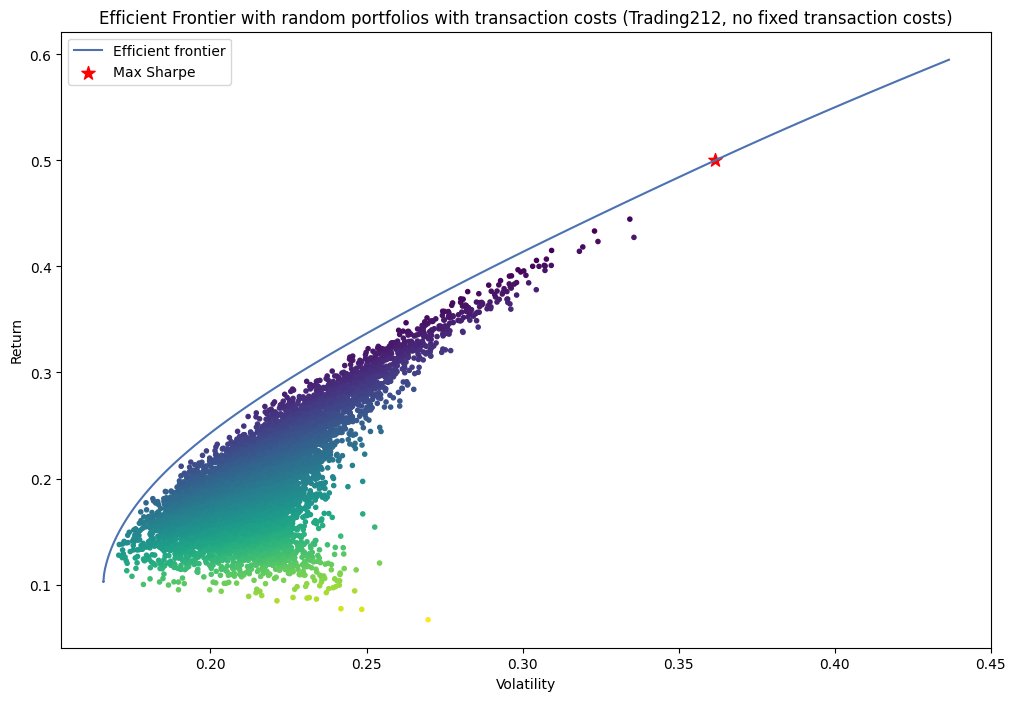

In [81]:
print("Optimal Sharpe return: ", np.round(sharpe_return,3))
print("Optimal Sharpe volatility: ", np.round(sharpe_volatility,3))
print("Optimal Sharpe ratio: ", np.round(ratio,3))
print(" ")
for i in range(n):
    print(tickers[i], " : ", np.round(sharpe_weights[i],3))
    

fig, ax = plt.subplots(figsize=(12, 8))

n_samples = 10000
w = np.random.dirichlet(np.ones(n), n_samples)
fixed = [x / B for x in f]
rets = w.dot(r-p) - cp.sum(fixed)
stds = np.sqrt(np.diag(w @ Sigma @ w.T))
sharpes = rets / stds

ax.scatter(stds, rets, marker=".", c=sharpes,  cmap="viridis_r")

plt.plot(ax1,ax2, label = "Efficient frontier")

ax.scatter(sharpe_volatility, sharpe_return, marker="*", s=100, c="r", label="Max Sharpe")

plt.xlabel("Volatility")
plt.ylabel("Return")
ax.set_title("Efficient Frontier with random portfolios with transaction costs (Trading212, no fixed transaction costs)")
ax.legend()
plt.savefig("trading.png")
plt.show()
    


Broker: XTB, no fixed costs, budget doesn't matter

In [82]:
p = p_matrix[1]
f = f_matrix[1]
ax1 = []
ax2 = []
ret = 0
ratio = -1000
for i in range(125):
    lam = cp.Variable(n)
    y = cp.Variable(n, boolean=True)
    objective = cp.Minimize(cp.quad_form(lam, Sigma))
    constraints = []
    constraints.append(cp.sum( cp.multiply(lam,r-p)) - (1/B) * cp.sum(cp.multiply(y,f))  >=  ret)
    constraints.append(cp.sum(lam) == 1)
    for i in range(n):
        constraints.append(0 <= lam[i])
        constraints.append(lam[i] <= y[i])
    problem = cp.Problem(objective, constraints)
    result = problem.solve(solver=cp.SCIP)
    lam_opt = lam.value
    y_opt = y.value
    ax1.append(np.sqrt(problem.value))
    ax2.append(np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f))
    new_ratio = ((np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f))-0.01)/np.sqrt(problem.value)
    if new_ratio > ratio:
        ratio = new_ratio
        sharpe_volatility = np.sqrt(problem.value)
        sharpe_return = np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f)
        sharpe_weights = lam_opt
    ret += 0.005   

Optimal Sharpe return:  0.505
Optimal Sharpe volatility:  0.368
Optimal Sharpe ratio:  1.345
 
 
AAPL  :  0.133
BP  :  0.0
CVX  :  0.0
GOOG  :  0.0
JNJ  :  0.0
JPM  :  0.0
MA  :  0.0
MSFT  :  0.203
NVDA  :  0.664
V  :  0.0


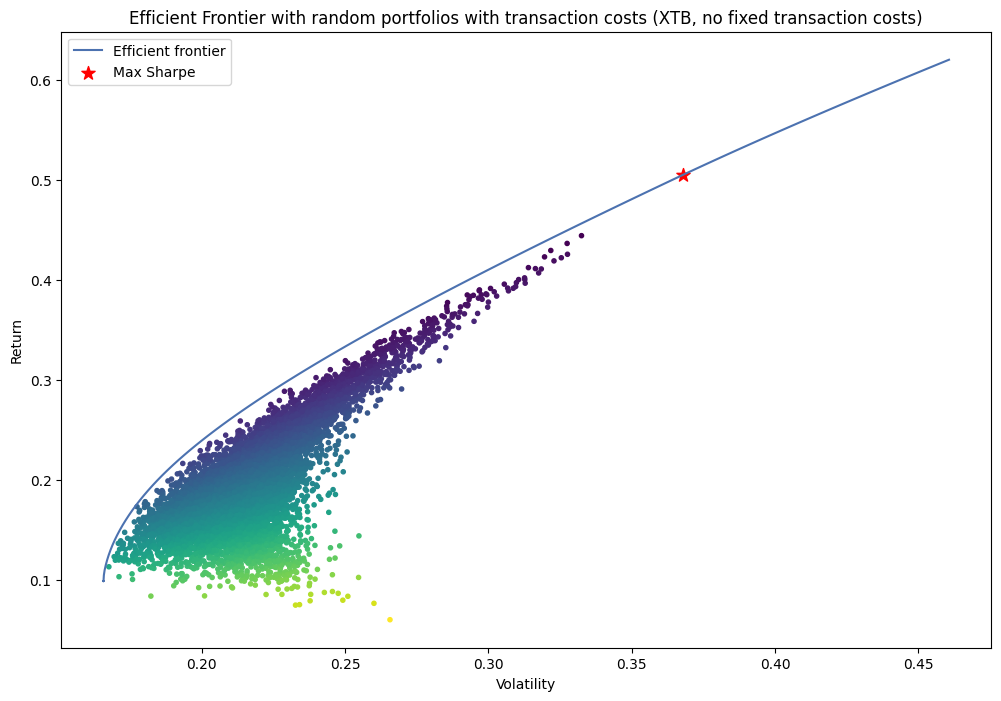

In [83]:
print("Optimal Sharpe return: ", np.round(sharpe_return,3))
print("Optimal Sharpe volatility: ", np.round(sharpe_volatility,3))
print("Optimal Sharpe ratio: ", np.round(ratio,3))
print(" ")
print(" ")
for i in range(n):
    print(tickers[i], " : ", np.round(sharpe_weights[i],3))


fig, ax = plt.subplots(figsize=(12, 8))

n_samples = 10000
w = np.random.dirichlet(np.ones(n), n_samples)
fixed = [x / B for x in f]
rets = w.dot(r-p) - cp.sum(fixed)
stds = np.sqrt(np.diag(w @ Sigma @ w.T))
sharpes = rets / stds

ax.scatter(stds, rets, marker=".", c=sharpes,  cmap="viridis_r")

plt.plot(ax1,ax2, label = "Efficient frontier")

ax.scatter(sharpe_volatility, sharpe_return, marker="*", s=100, c="r", label="Max Sharpe")

plt.xlabel("Volatility")
plt.ylabel("Return")
ax.set_title("Efficient Frontier with random portfolios with transaction costs (XTB, no fixed transaction costs)")
ax.legend()
plt.savefig("xtb.png")
plt.show()

Broker: Patria, with fixed transaction costs, budgets: 100,1000,10000

B=100

In [84]:
B=100

In [85]:
p = p_matrix[2]
f = f_matrix[2]
ax1 = []
ax2 = []
ret = 0
ratio = -1000
for i in range(70):
    lam = cp.Variable(n)
    y = cp.Variable(n, boolean=True)
    objective = cp.Minimize(cp.quad_form(lam, Sigma))
    constraints = []
    constraints.append(cp.sum( cp.multiply(lam,r-p)) - (1/B) * cp.sum(cp.multiply(y,f))  >=  ret)
    constraints.append(cp.sum(lam) == 1)
    for i in range(n):
        constraints.append(0 <= lam[i])
        constraints.append(lam[i] <= y[i])
    problem = cp.Problem(objective, constraints)
    result = problem.solve(solver=cp.SCIP)
    lam_opt = lam.value
    y_opt = y.value
    ax1.append(np.sqrt(problem.value))
    ax2.append(np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f))
    new_ratio = ((np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f))-0.01)/np.sqrt(problem.value)
    if new_ratio > ratio:
        ratio = new_ratio
        sharpe_volatility = np.sqrt(problem.value)
        sharpe_return = np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f)
        sharpe_weights = lam_opt
    ret += 0.005 

Optimal Sharpe return:  0.465
Optimal Sharpe volatility:  0.464
Optimal Sharpe ratio:  0.98
 
AAPL  :  0.0
BP  :  0.0
CVX  :  0.0
GOOG  :  0.0
JNJ  :  0.0
JPM  :  0.0
MA  :  0.0
MSFT  :  0.0
NVDA  :  1.0
V  :  -0.0


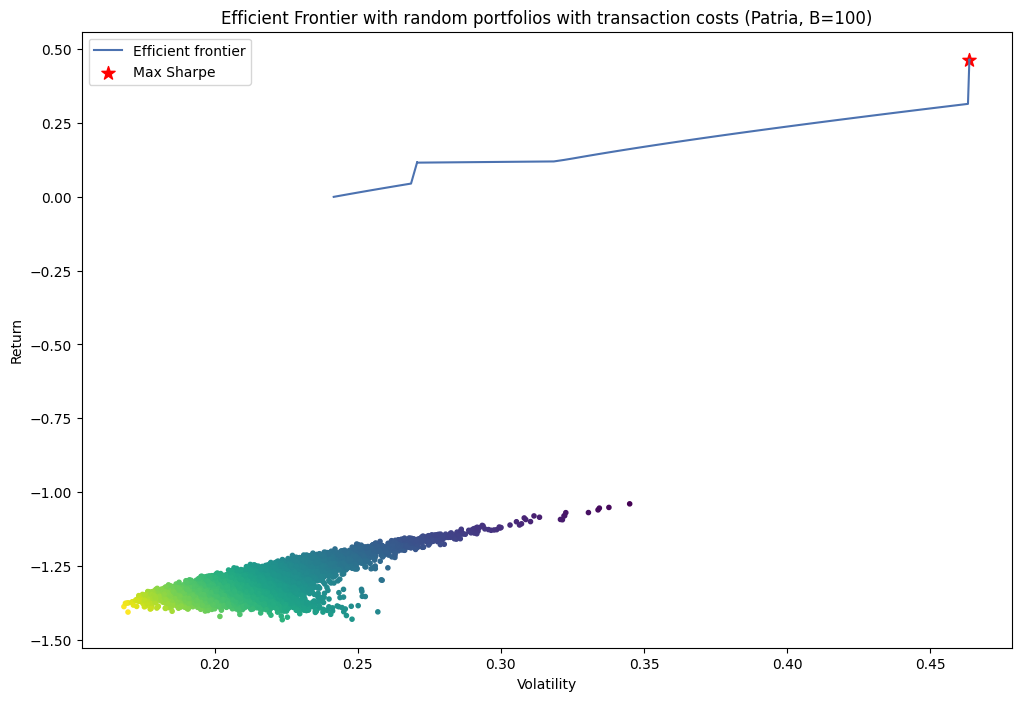

In [87]:
print("Optimal Sharpe return: ", np.round(sharpe_return,3))
print("Optimal Sharpe volatility: ", np.round(sharpe_volatility,3))
print("Optimal Sharpe ratio: ", np.round(ratio,3))
print(" ")
for i in range(n):
    print(tickers[i], " : ", np.round(sharpe_weights[i],3))
    
fig, ax = plt.subplots(figsize=(12, 8))

n_samples = 10000
w = np.random.dirichlet(np.ones(n), n_samples)
fixed = [x / B for x in f]
rets = w.dot(r-p) - cp.sum(fixed)
stds = np.sqrt(np.diag(w @ Sigma @ w.T))
sharpes = rets / stds

ax.scatter(stds, rets, marker=".", c=sharpes,  cmap="viridis_r")

plt.plot(ax1,ax2, label = "Efficient frontier")

ax.scatter(sharpe_volatility, sharpe_return, marker="*", s=100, c="r", label="Max Sharpe")

plt.xlabel("Volatility")
plt.ylabel("Return")
ax.set_title("Efficient Frontier with random portfolios with transaction costs (Patria, B=100)")
ax.legend()
plt.savefig("patria100.png")
plt.show()

B = 1000

In [88]:
B = 1000

In [89]:
p = p_matrix[2]
f = f_matrix[2]
ax1 = []
ax2 = []
ret = 0
ratio = -1000
for i in range(120):
    lam = cp.Variable(n)
    y = cp.Variable(n, boolean=True)
    objective = cp.Minimize(cp.quad_form(lam, Sigma))
    constraints = []
    constraints.append(cp.sum( cp.multiply(lam,r-p)) - (1/B) * cp.sum(cp.multiply(y,f))  >=  ret)
    constraints.append(cp.sum(lam) == 1)
    for i in range(n):
        constraints.append(0 <= lam[i])
        constraints.append(lam[i] <= y[i])
    problem = cp.Problem(objective, constraints)
    result = problem.solve(solver=cp.SCIP)
    lam_opt = lam.value
    y_opt = y.value
    ax1.append(np.sqrt(problem.value))
    ax2.append(np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f))
    new_ratio = ((np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f))-0.01)/np.sqrt(problem.value)
    if new_ratio > ratio:
        ratio = new_ratio
        sharpe_volatility = np.sqrt(problem.value)
        sharpe_return = np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f)
        sharpe_weights = lam_opt
    ret += 0.005 

Optimal Sharpe return:  0.599
Optimal Sharpe volatility:  0.464
Optimal Sharpe ratio:  1.269
 
AAPL  :  0.0
BP  :  0.0
CVX  :  0.0
GOOG  :  0.0
JNJ  :  0.0
JPM  :  0.0
MA  :  0.0
MSFT  :  0.0
NVDA  :  1.0
V  :  0.0


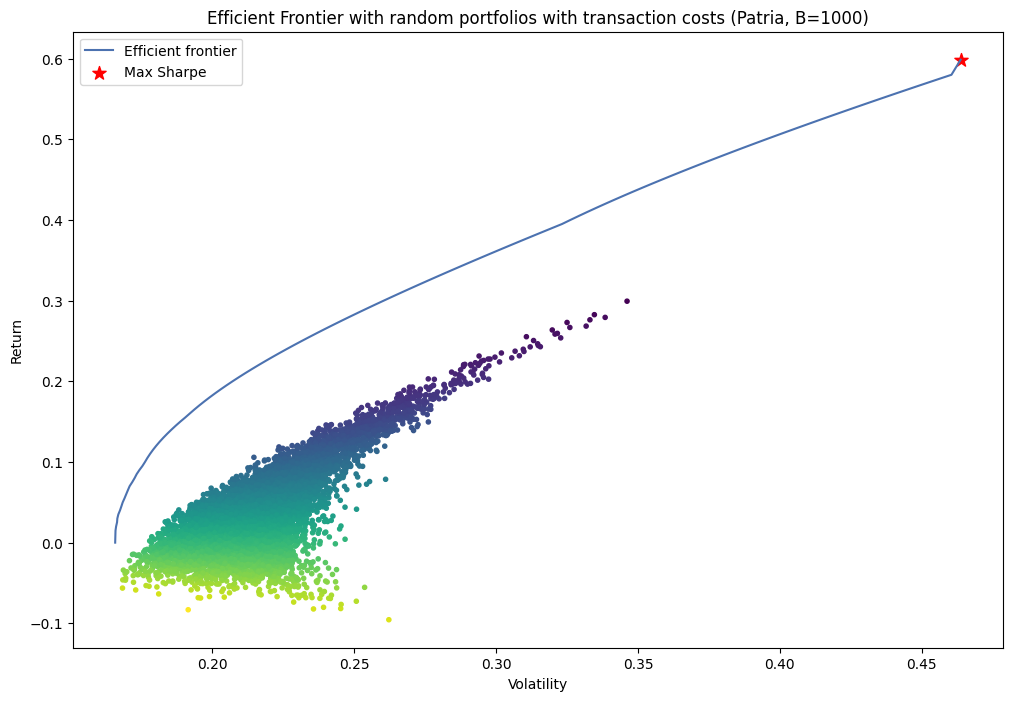

In [90]:
print("Optimal Sharpe return: ", np.round(sharpe_return,3))
print("Optimal Sharpe volatility: ", np.round(sharpe_volatility,3))
print("Optimal Sharpe ratio: ", np.round(ratio,3))
print(" ")
for i in range(n):
    print(tickers[i], " : ", np.round(sharpe_weights[i],3))
    
fig, ax = plt.subplots(figsize=(12, 8))

n_samples = 10000
w = np.random.dirichlet(np.ones(n), n_samples)
fixed = [x / B for x in f]
rets = w.dot(r-p) - cp.sum(fixed)
stds = np.sqrt(np.diag(w @ Sigma @ w.T))
sharpes = rets / stds

ax.scatter(stds, rets, marker=".", c=sharpes,  cmap="viridis_r")

plt.plot(ax1,ax2, label = "Efficient frontier")

ax.scatter(sharpe_volatility, sharpe_return, marker="*", s=100, c="r", label="Max Sharpe")

plt.xlabel("Volatility")
plt.ylabel("Return")
ax.set_title("Efficient Frontier with random portfolios with transaction costs (Patria, B=1000)")
ax.legend()
plt.savefig("patria1000.png")
plt.show()

B = 10000

In [91]:
B = 10000

In [92]:
p = p_matrix[2]
f = f_matrix[2]
ax1 = []
ax2 = []
ret = 0
ratio = -1000
for i in range(120):
    lam = cp.Variable(n)
    y = cp.Variable(n, boolean=True)
    objective = cp.Minimize(cp.quad_form(lam, Sigma))
    constraints = []
    constraints.append(cp.sum( cp.multiply(lam,r-p)) - (1/B) * cp.sum(cp.multiply(y,f))  >=  ret)
    constraints.append(cp.sum(lam) == 1)
    for i in range(n):
        constraints.append(0 <= lam[i])
        constraints.append(lam[i] <= y[i])
    problem = cp.Problem(objective, constraints)
    result = problem.solve(solver=cp.SCIP)
    lam_opt = lam.value
    y_opt = y.value
    ax1.append(np.sqrt(problem.value))
    ax2.append(np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f))
    new_ratio = ((np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f))-0.01)/np.sqrt(problem.value)
    if new_ratio > ratio:
        ratio = new_ratio
        sharpe_volatility = np.sqrt(problem.value)
        sharpe_return = np.dot(lam_opt,r-p) - (1/B) * np.dot(y_opt,f)
        sharpe_weights = lam_opt
    ret += 0.005 

Optimal Sharpe return:  0.52
Optimal Sharpe volatility:  0.39
Optimal Sharpe ratio:  1.308
 
AAPL  :  0.0
BP  :  -0.0
CVX  :  -0.0
GOOG  :  -0.0
JNJ  :  -0.0
JPM  :  -0.0
MA  :  -0.0
MSFT  :  0.26
NVDA  :  0.74
V  :  -0.0


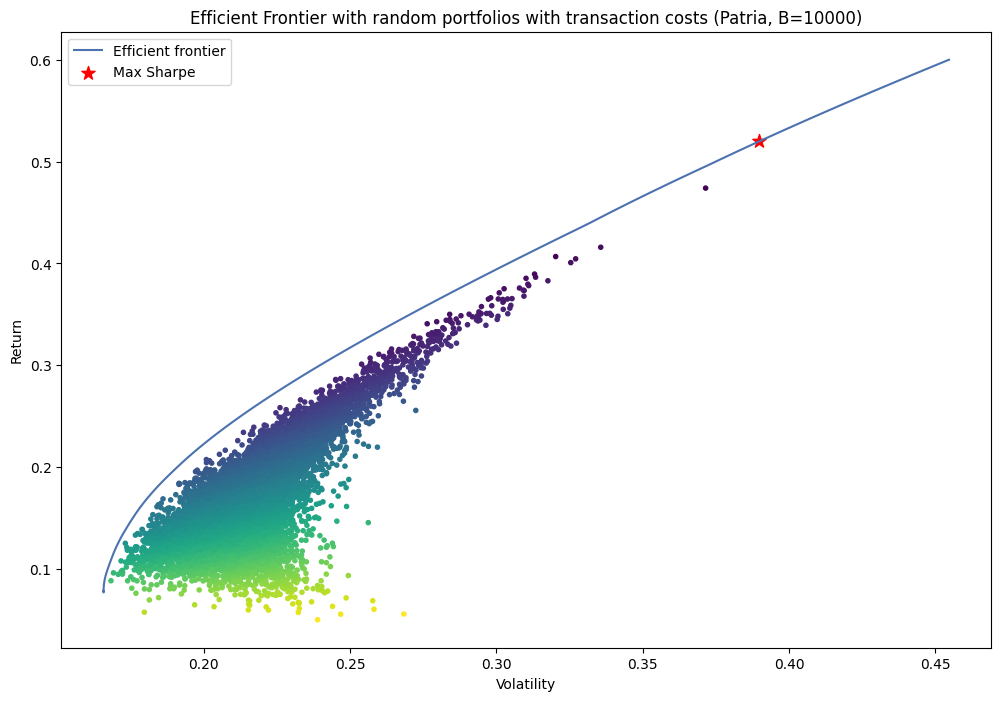

In [93]:
print("Optimal Sharpe return: ", np.round(sharpe_return,3))
print("Optimal Sharpe volatility: ", np.round(sharpe_volatility,3))
print("Optimal Sharpe ratio: ", np.round(ratio,3))
print(" ")
for i in range(n):
    print(tickers[i], " : ", np.round(sharpe_weights[i],3))
    
fig, ax = plt.subplots(figsize=(12, 8))

n_samples = 10000
w = np.random.dirichlet(np.ones(n), n_samples)
fixed = [x / B for x in f]
rets = w.dot(r-p) - cp.sum(fixed)
stds = np.sqrt(np.diag(w @ Sigma @ w.T))
sharpes = rets / stds

ax.scatter(stds, rets, marker=".", c=sharpes,  cmap="viridis_r")

plt.plot(ax1,ax2, label = "Efficient frontier")

ax.scatter(sharpe_volatility, sharpe_return, marker="*", s=100, c="r", label="Max Sharpe")

plt.xlabel("Volatility")
plt.ylabel("Return")
ax.set_title("Efficient Frontier with random portfolios with transaction costs (Patria, B=10000)")
ax.legend()
plt.savefig("patria10000.png")
plt.show()